Dataset Info
This data is taken from UCI.
https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Objective: to build a classifier that can predict whether a person is going to default or not based
on their credit history details
1. Import required libraries
2. Read the provided csv file and check shape, info, and statistical summary of the data (5 marks)
3. Select columns having data type as object and save it in a new data frame (5 marks)
4. Check the shape and info of the above data frame having only object columns (5 marks)
5. Check for correlation among the predictors in the original dataset. (5 marks)
6. Drop irrelevant columns (subjective task) (5 Marks)
7. Encode above categorical data using get dummies and drop first. (hint - get dummies (data, drop
first=True) (5 marks)
8. Separate target column from the features (5marks)
9. Split the data (Use 70:30 split) (5 marks)
10. Apply Random forest model (5 marks)
11. Evaluate above model using accuracy and confusion matrix (5 marks)
12. Check feature importance (Hint - RF.feature_importances_) ( 5 marks)
13. Apply Grid Search to tune important hyperparameters like,n_estimators,criterion, max_depth, and
min_samples_leaf ( 5 marks)
14. Apply K-fold cross validation and check score for random forest model with the best parameters from
grid search (5 marks)
15. Comment your findings (5marks)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

In [1]:
# 1. Import required libraries
import numpy as np
import pandas as pd  
from time import time
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
#2. Read the provided csv file and check shape, info, and statistical summary of the data
#reading the CSV file into pandas dataframe
Read = pd.read_csv("Credit.csv") 

In [3]:
Read.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
Read.shape

(1000, 17)

In [5]:
Read.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


#Statistical Data Summary




1. Almost all the features has mean and median values almost similar , 
   it signifies that it is normally distribited and has no skewness or outlier.


2. Amount has noticable differance between mean and median values, it signifies that it has some skewness or outlier.


3. No missing data is there in the whole dataset.


In [27]:
Read['dependents'].value_counts()

1    845
2    155
Name: dependents, dtype: int64

In [6]:
Read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [7]:
#3. Select columns having data type as object and save it in a new data frame
Conversion = Read.select_dtypes(include ='object')
Conversion.head(10)

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes,no
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,yes
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no,yes
5,unknown,good,education,unknown,1 - 4 years,none,other,unskilled,yes,no
6,unknown,good,furniture/appliances,500 - 1000 DM,> 7 years,none,own,skilled,no,no
7,1 - 200 DM,good,car,< 100 DM,1 - 4 years,none,rent,management,yes,no
8,unknown,good,furniture/appliances,> 1000 DM,4 - 7 years,none,own,unskilled,no,no
9,1 - 200 DM,critical,car,< 100 DM,unemployed,none,own,management,no,yes


In [8]:
#4. Check the shape and info of the above data frame having only object columns
Conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
checking_balance       1000 non-null object
credit_history         1000 non-null object
purpose                1000 non-null object
savings_balance        1000 non-null object
employment_duration    1000 non-null object
other_credit           1000 non-null object
housing                1000 non-null object
job                    1000 non-null object
phone                  1000 non-null object
default                1000 non-null object
dtypes: object(10)
memory usage: 78.2+ KB


In [9]:
Conversion.shape # 10 coloums are extracted and stored in Conversion dataframe having datatype object

(1000, 10)

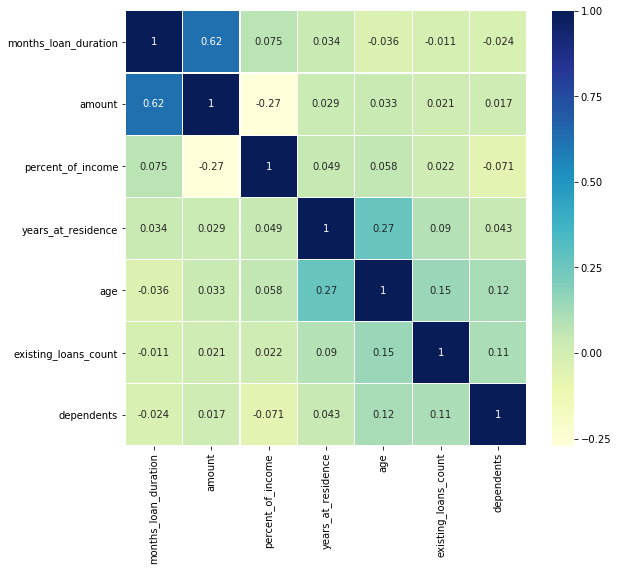

In [10]:
#5.Check for correlation among the predictors in the original dataset
corrmat = Read.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)



#Insights

1. Amount and moths_loan_duration have good correlation of 0.62
2. Percent of income and amount is weakly and negatively correlated having value -0.27.
3. Years and year_at_resident is weakly correlated having value 0.27.
4. There are no strongly correlated features

In [11]:
for feature in Read.columns: # Loop through all columns in the dataframe
    if Read[feature].dtype == 'object': # Only apply for columns with categorical strings
         Read[feature] = pd.Categorical(Read[feature])# Replace strings with an integer
Read.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [12]:
7. #One Hot Encoding

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
             
                
                    }
oneHotCols=["purpose","housing","other_credit","job"]


In [13]:
7. #Encode above categorical data using get dummies and drop first. (hint - get dummies (data, dropfirst=True)
Read=Read.replace(replaceStruct)
Read=pd.get_dummies(Read, columns=oneHotCols)
Read.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [14]:
Read.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [15]:
#8. Separate target column from the features 
X = Read.drop("default" , axis=1)
y = Read.pop("default")

In [16]:
#6. Drop irrelevant columns (subjective task)
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)
print('mutual info       ', mut_info_score)
Coloumns having p value less then 0.05 can be removed.

F - score score    [6.58468788e+01 4.83337901e+01 5.51230446e+01 2.44823659e+01
 1.95301980e-01 1.36127389e+01 5.25941707e+00 8.78650037e-03
 8.35699451e+00 2.09165227e+00 9.07124289e-03 1.32889060e+00
 1.30440117e+00 5.10954549e-01 7.86268993e-01 2.41028811e+00
 6.14627507e+00 4.33106014e-01 6.68246815e+00 1.84114172e+01
 8.66653223e+00 9.38296765e+00 1.29743688e+01 2.55401030e+00
 1.64442024e+00 1.83523354e-01 3.53415077e-02 4.75464507e-01]
F - score p-value  [1.42411492e-15 6.48804988e-12 2.42306007e-13 8.79757237e-07
 6.58635723e-01 2.36793932e-04 2.20354863e-02 9.25337421e-01
 3.92533940e-03 1.48419786e-01 9.24140878e-01 2.49278711e-01
 2.53684797e-01 4.74893100e-01 3.75444312e-01 1.20857220e-01
 1.33331646e-02 5.10620571e-01 9.87747574e-03 1.95306396e-05
 3.31616846e-03 2.24884372e-03 3.31348778e-04 1.10331226e-01
 2.00017848e-01 6.68455088e-01 8.50920063e-01 4.90644214e-01]
mutual info        [0.06105778 0.04345415 0.04678007 0.01413492 0.03749891 0.00916629
 0.02665593 0.002894

In [17]:
#9. Split the data (Use 70:30 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [31]:
#10. Apply Random forest model 
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=10)
rfcl = rfcl.fit(X_train, y_train)#checking feature importance

In [32]:
#11. Evaluate above model using accuracy and confusion matrix 
from sklearn import metrics
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(rfcl.feature_importances_)

0.7466666666666667
[0.1062586  0.10495615 0.07500275 0.16922353 0.04305266 0.05606291
 0.05070666 0.04474315 0.11655145 0.02049872 0.01236577 0.02125913
 0.01234542 0.01944107 0.00172576 0.00724956 0.01754768 0.00599383
 0.00826813 0.01241995 0.01049164 0.01563226 0.01846312 0.0098196
 0.01013847 0.014725   0.00298458 0.01207244]


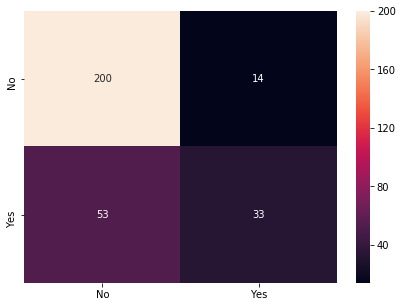

In [20]:
cm=metrics.confusion_matrix(y_test, y_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

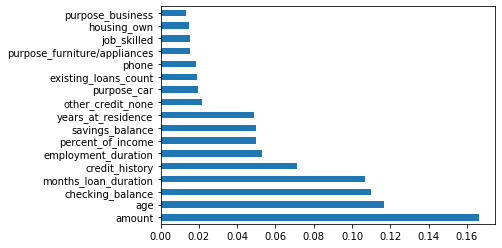

In [21]:
#12. Check feature importance

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfcl.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

 

Top 11 Features are listed below:(importance greater then 0.05)
1. amount
2. age
3. months_loan_duration
4. percemt_of_income
5. employment_duration
6. checking balance
7. years_at_residence
8. phone
9. credit_history
10. savings_balance
11. existing_loans_count

In [22]:
# Apply Grid Search to tune important hyperparameters like,n_estimators,criterion, max_depth, and min_samples_leaf

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [5,8,10,12],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [23]:
# Fit the grid search to the data
# run grid search
grid_search = GridSearchCV(rfcl, param_grid=param_grid)
start = time()
grid_search.fit(X, y)


C:\Soumya_Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=12,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'boot

In [24]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [25]:
best_result = grid_search.best_score_
print(best_result)

0.766


In [28]:
#Apply K-fold cross validation and check score for random forest model with the best parameters from grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = RandomForestClassifier(bootstrap = True,
 max_depth= 80,
 max_features= 12,
 min_samples_leaf= 3,
 min_samples_split= 10,
 n_estimators= 50)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.65 0.9  0.9  0.9  0.85 0.8  0.7  0.65 0.8  0.65 0.65 0.55 0.9  0.75
 0.75 0.75 0.75 0.8  0.9  0.85 0.6  0.75 0.75 0.75 0.85 0.75 0.85 0.65
 0.8  0.75 0.65 0.65 0.45 0.8  0.95 0.9  0.9  0.65 0.9  0.8  0.85 0.8
 0.8  0.7  0.7  0.8  0.75 0.75 0.85 0.7 ]
Accuracy: 76.600% (10.317%)


#Observations
Accuracy for random forest is 74.6
While accuracy using gridsearch is 76.6 which is clearly seen increased.
